In [1]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

INPUT_PATH = '/home/zju/slx/binarylearning/bisheData/model_input/'

def build_dataset(input_path):
    corpus = []
    labels = []
    dir_list = os.listdir(input_path)
    for dir in dir_list:
        dir_path = os.path.join(INPUT_PATH,dir)
        current_label = dir
        file_list = os.listdir(dir_path)
        for file_name in file_list:
            file_path = os.path.join(dir_path,file_name)
            f = open(file_path,mode='r')
            content = ' '.join(f.read().split('!'))
            corpus.append(content)
            labels.append(current_label)
    return corpus,labels

corpus,labels = build_dataset(INPUT_PATH)

tfidf_vectorizer = TfidfVectorizer(analyzer='word')
tfidf_vector = tfidf_vectorizer.fit_transform(corpus)

tf_vectorizer = CountVectorizer()
tf_vector = tf_vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=30,learning_method='batch')
lda_res = lda.fit_transform(tf_vector)
print lda_res

[[  4.62962963e-05   1.17343220e-01   4.62962963e-05 ...,   4.62962963e-05
    4.62962963e-05   4.62962963e-05]
 [  2.90082659e-01   8.04590571e-02   5.94177065e-05 ...,   5.94177065e-05
    5.94177065e-05   5.94177065e-05]
 [  8.43881857e-05   8.13392018e-01   8.43881857e-05 ...,   4.19324480e-02
    8.43881857e-05   8.43881857e-05]
 ..., 
 [  2.94464075e-05   2.94464075e-05   2.94464075e-05 ...,   2.94464075e-05
    2.94464075e-05   2.94464075e-05]
 [  4.52898551e-05   5.00481898e-03   4.52898551e-05 ...,   4.52898551e-05
    4.52898551e-05   4.52898551e-05]
 [  2.77085065e-05   2.77085065e-05   2.77085065e-05 ...,   2.77085065e-05
    2.77085065e-05   2.77085065e-05]]


In [2]:
from __future__ import division

In [3]:
def compute_corre(z1,z2):
    assert len(z1) == len(z2)
    vocab_len = len(z1)
    numerator = z1.dot(z2)
    denominator = np.sqrt(np.reducce_sum(z1.dot(zi))*np.reduce_sum(z2.dot(z2)))
    return numerator/denominator

def compute_similarity(topic_word,k):
    numerator=0.
    for i in range(k-1):
        z1 = topic_word[i]
        j = i+1
        while j<=k:
            z2 = topic_word[j]
            corre = compute_corre(z1,z2)
            numerator = numerator+corre
            j = j+1
    return numerator/((k-1)/2*k)

In [4]:
lda.components_

array([[ 0.03333333,  0.03333333,  0.03333333, ...,  0.03333333,
         0.03333333,  0.03333333],
       [ 0.03333333,  0.03333333,  0.03333333, ...,  2.03333333,
         0.03333333,  0.03333333],
       [ 0.03333333,  0.03333333,  0.03333333, ...,  0.03333333,
         0.03333333,  0.03333333],
       ..., 
       [ 0.03333333,  0.03333333,  0.03333333, ...,  0.03333333,
         0.03333333,  0.03333333],
       [ 0.03333333,  0.03333333,  0.03333333, ...,  0.03333333,
         0.03333333,  0.03333333],
       [ 0.03333333,  0.03333333,  0.03333333, ...,  0.03333333,
         0.03333333,  0.03333333]])

In [5]:
lda_res.shape

(49768, 30)

In [6]:
lda.components_.shape

(30, 2588)

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [8]:
labels = np.array(labels)
labels.shape

(49768,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x,test_x,train_y,test_y = train_test_split(lda_res,labels,test_size=0.3)

In [11]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((34837, 30), (14931, 30), (34837,), (14931,))

In [12]:
LR = LogisticRegression(penalty='l2',C=5,verbose=5,n_jobs=5,tol=1e-5,solver='newton-cg',multi_class='ovr')

In [13]:
LR.fit(X=train_x,y=train_y)

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   29.4s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   47.3s finished


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=5,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=5, warm_start=False)

In [14]:
LR.classes_

array(['1', '10', '100', '101', '102', '103', '104', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83',
       '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '99'], 
      dtype='|S3')

In [15]:
LR.coef_

array([[-3.71045982,  0.96479361, -1.90000494, ...,  0.75681957,
        -2.87550624, -1.99736394],
       [-1.56028815, -8.04604355, -6.45583348, ..., -0.22628525,
         3.93729661, -3.19653742],
       [-0.27961683,  2.71836097, -6.27475496, ..., -0.9893    ,
         0.30541709, -2.15700996],
       ..., 
       [ 3.62492419,  1.49271494, -1.53096756, ..., -2.28266435,
         4.44482516, -2.11074446],
       [-3.0037661 , -2.88778709, -4.15673924, ..., -5.96470583,
        -2.12036931, -3.32092191],
       [-0.73931368, -6.41459093,  6.78169692, ..., -1.33261809,
         3.70479591, -2.18209998]])

In [16]:
LR.intercept_

array([-8.15479196, -7.82834518, -7.92029909, -6.01269314, -5.95035699,
       -7.34196184, -7.57329851, -7.76206466, -7.84858653, -7.17703901,
       -7.1360867 , -8.03625315, -6.21772464, -6.41261753, -8.20937362,
       -6.19255015, -6.59691214, -6.32882906, -6.24569453, -8.77273396,
       -6.14217819, -7.21388515, -6.72876448, -6.99069812, -5.97032948,
       -7.21265439, -7.19715973, -8.36673176, -7.3419484 , -6.46859636,
       -6.94375307, -8.08208493, -7.78940381, -9.37328682, -6.72900623,
       -6.86298983, -7.73395884, -7.93738508, -8.03955557, -7.99527016,
       -6.51608593, -7.50425341, -7.22693119, -7.38369663, -8.01853144,
       -7.65910449, -6.55664004, -6.18722765, -6.45983744, -7.96342357,
       -7.9316403 , -6.74255084, -6.96710523, -9.27009805, -6.58997062,
       -6.25061832, -6.57645683, -7.40068758, -6.04280863, -6.88710824,
       -7.48659824, -8.42558133, -8.03407003, -6.84518549, -7.99452208,
       -6.41117351, -8.9151586 , -6.68861049, -5.79672161, -6.28

In [17]:
pred_y = LR.predict(X=test_x)

In [18]:
pred_y

array(['84', '67', '84', ..., '7', '71', '10'], 
      dtype='|S3')

In [19]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [20]:
recall = recall_score(y_pred=pred_y,y_true=test_y,average='macro')
prec = precision_score(y_pred=pred_y,y_true=test_y,average='macro')
f1 = f1_score(y_pred=pred_y,y_true=test_y,average='macro')
acc = accuracy_score(y_pred=pred_y,y_true=test_y)
recall,prec,f1,acc

(0.37746160849974025,
 0.38862402766505344,
 0.35605258184218624,
 0.37465675440358986)

In [21]:
import sklearn
train_size,train_score,valid_score = sklearn.model_selection.learning_curve(estimator=LR,X=train_x,y=train_y,train_sizes=np.linspace(0.1,1.0,5),cv=3,shuffle=True,scoring='accuracy',verbose=3,n_jobs=5)

[learning_curve] Training set sizes: [ 2318  7535 12752 17969 23187]
[CV]  ................................................................


/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV]  ................................................................


/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................


/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................


/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   1 out of   

[CV] ........................... , score=0.252188841202, total=   8.1s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:    9.2s finished


[CV] ........................... , score=0.263330174864, total=   9.2s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   26.0s finished


[CV] ............................ , score=0.32678111588, total=  26.0s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   26.1s finished


[CV] ........................... , score=0.323542079421, total=  26.1s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   4 out of  15 | elapsed:   43.6s remaining:  2.0min
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   45.2s finished


[CV] ........................... , score=0.352618025751, total=  45.3s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.1min finished


[CV] ........................... , score=0.361974248927, total= 1.1min
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   47.9s finished


[CV] ........................... , score=0.345852355931, total=  47.9s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   10.6s finished


[CV] ........................... , score=0.263430644325, total=  10.7s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.4min finished


[CV] ........................... , score=0.366094420601, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   26.9s finished


[CV] ........................... , score=0.337536707549, total=  27.0s
[CV]  ................................................................


[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:  1.7min remaining:   50.6s
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.1min finished


[CV] ........................... , score=0.358687225429, total= 1.1min


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   47.6s finished


[CV] ........................... , score=0.352565209881, total=  47.6s


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.4min finished


[CV] ........................... , score=0.364027909381, total= 1.4min


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   48.2s finished


[CV] ........................... , score=0.367420970807, total=  48.2s


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   42.7s finished


[CV] ........................... , score=0.375107963379, total=  42.8s


[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:  2.4min finished


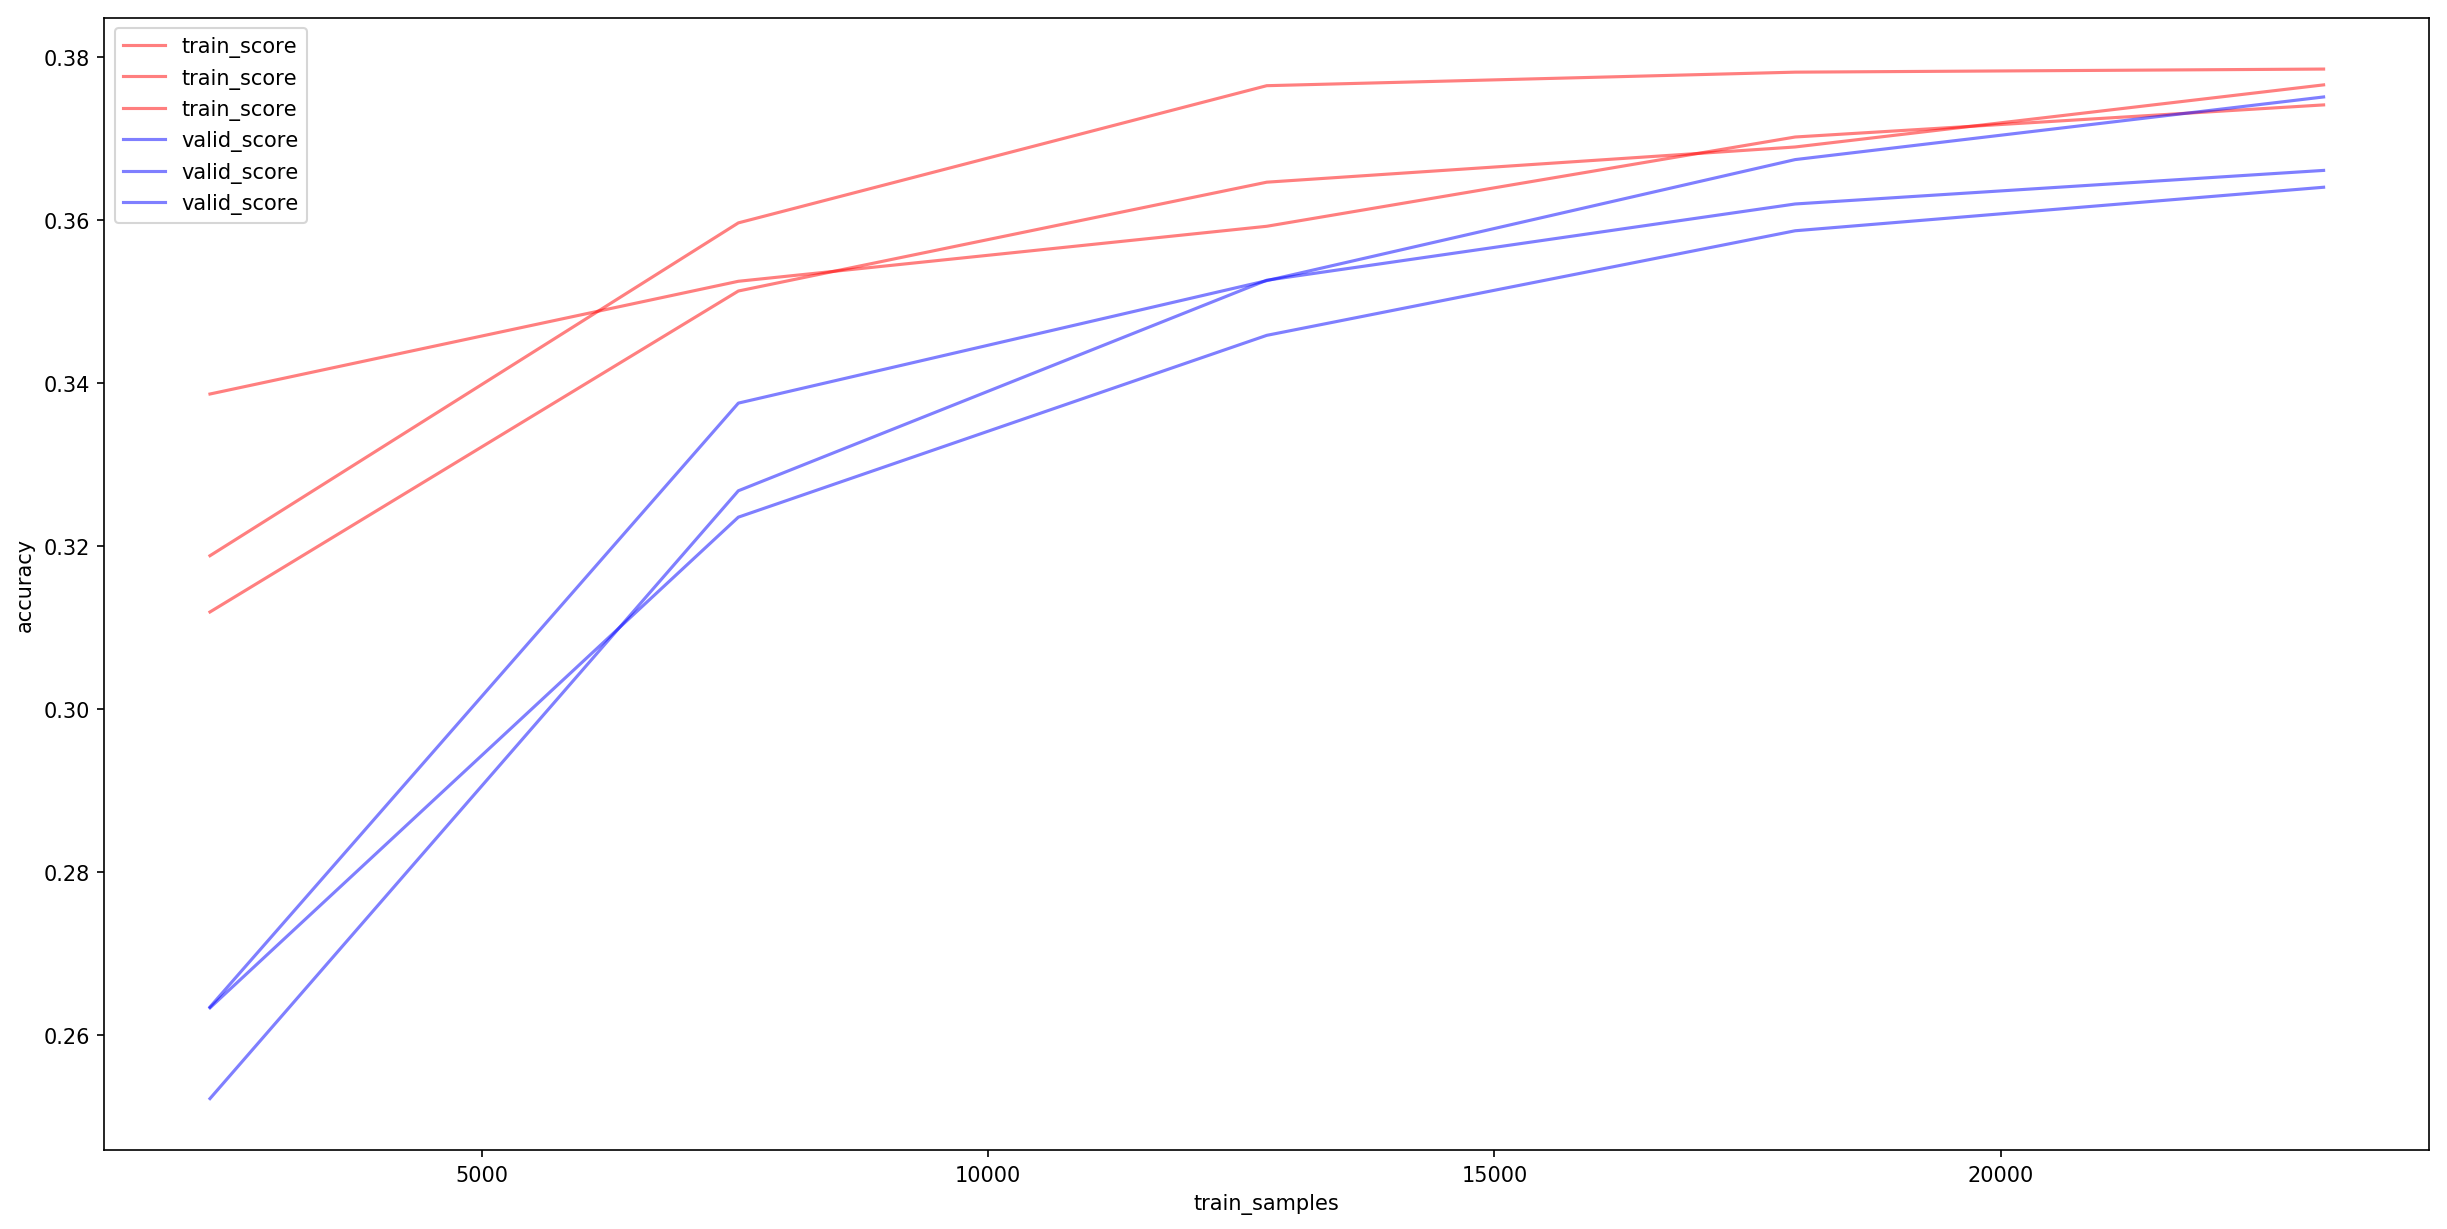

In [24]:
plt.figure(figsize=(20,10),dpi=150)
plt.plot(train_size,train_score,label='train_score',color='red',alpha=0.5)
plt.plot(train_size,valid_score,label='valid_score',color='blue',alpha=0.5)
plt.xlabel('train_samples')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
train_parascore,valid_parascore = sklearn.model_selection.validation_curve(estimator=LR,X=train_x,y=train_y,param_name='solver',cv=3,param_range=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   17.2s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   27.9s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   15.3s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   25.2s finished


[LibLinear]convergence after 26 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 35 epochs took 3 seconds
convergence after 24 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 27 epochs took 2 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    4.8s


convergence after 24 epochs took 2 seconds
convergence after 28 epochs took 3 seconds
convergence after 23 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 3 seconds
convergence after 32 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 3 seconds
convergence after 26 epochs took 2 seconds
convergence after 27 epochs took 3 seconds
convergence after 31 epochs took 3 seconds
convergence after 27 epochs took 3 seconds
convergence after 24 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 39 epochs took 4 seconds
convergence after 32 epochs took 2 seconds
convergence after 36 epochs took 3 seconds
convergence after 29 epochs took 2 seconds
convergence after 31 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   30.4s


convergence after 28 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 31 epochs took 3 seconds
convergence after 36 epochs took 3 seconds
convergence after 27 epochs took 2 seconds
convergence after 26 epochs took 3 seconds
convergence after 39 epochs took 3 seconds
convergence after 33 epochs took 2 seconds
convergence after 29 epochs took 3 seconds
convergence after 30 epochs took 3 seconds
convergence after 29 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 36 epochs took 3 seconds
convergence after 30 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   49.7s finished


convergence after 41 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 50 epochs took 5 seconds
convergence after 48 epochs took 5 seconds
convergence after 43 epochs took 3 seconds
convergence after 47 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 49 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    8.1s


convergence after 58 epochs took 4 seconds
convergence after 51 epochs took 5 seconds
convergence after 49 epochs took 4 seconds
convergence after 47 epochs took 5 seconds
convergence after 47 epochs took 4 seconds
convergence after 48 epochs took 5 seconds
convergence after 49 epochs took 4 seconds
convergence after 53 epochs took 5 seconds
convergence after 49 epochs took 5 seconds
convergence after 60 epochs took 6 seconds
convergence after 55 epochs took 5 seconds
convergence after 49 epochs took 4 seconds
convergence after 48 epochs took 3 seconds
convergence after 53 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 44 epochs took 3 seconds
convergence after 47 epochs took 4 seconds
convergence after 56 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 56 epochs took 4 seconds
convergence after 47 epochs took 3 seconds
convergence after 50 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   50.9s


convergence after 47 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 49 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 53 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 44 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 47 epochs took 3 seconds
convergence after 49 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 58 epochs took 5 seconds
convergence after 48 epochs took 3 seconds
convergence after 51 epochs took 4 seconds
convergence after 48 epochs took 3 seconds
convergence after 48 epochs took 4 seconds
convergence after 54 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.4min finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   17.9s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   28.4s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   16.4s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   26.6s finished


[LibLinear]convergence after 23 epochs took 2 seconds
convergence after 24 epochs took 2 seconds
convergence after 23 epochs took 2 seconds
convergence after 26 epochs took 3 seconds
convergence after 37 epochs took 3 seconds
convergence after 30 epochs took 2 seconds
convergence after 30 epochs took 2 seconds
convergence after 28 epochs took 2 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    4.6s


convergence after 31 epochs took 3 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 30 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 29 epochs took 3 seconds
convergence after 26 epochs took 2 seconds
convergence after 37 epochs took 3 seconds
convergence after 25 epochs took 1 seconds
convergence after 33 epochs took 3 seconds
convergence after 30 epochs took 2 seconds
convergence after 31 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   29.6s


convergence after 29 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 33 epochs took 3 seconds
convergence after 27 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 33 epochs took 3 seconds
convergence after 28 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 32 epochs took 3 seconds
convergence after 27 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 33 epochs took 3 seconds
convergence after 25 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 35 epochs took 2 seconds
convergence after 32 epochs took 3 seconds
convergence after 30 epochs took 2 seconds
convergence after 30 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   48.3s finished


convergence after 40 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 49 epochs took 5 seconds
convergence after 52 epochs took 5 seconds
convergence after 44 epochs took 3 seconds
convergence after 48 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 49 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    8.0s


convergence after 58 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 46 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 59 epochs took 5 seconds
convergence after 57 epochs took 5 seconds
convergence after 49 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 55 epochs took 4 seconds
convergence after 45 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 56 epochs took 4 seconds
convergence after 52 epochs took 5 seconds
convergence after 48 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   50.8s


convergence after 49 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 46 epochs took 3 seconds
convergence after 53 epochs took 4 seconds
convergence after 45 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 49 epochs took 3 seconds
convergence after 48 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 57 epochs took 5 seconds
convergence after 48 epochs took 3 seconds
convergence after 53 epochs took 5 seconds
convergence after 49 epochs took 3 seconds
convergence after 49 epochs took 3 seconds
convergence after 50 epochs took 3 seconds
convergence after 56 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.3min finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   17.1s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   28.0s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   15.9s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   25.8s finished


[LibLinear]convergence after 27 epochs took 2 seconds
convergence after 24 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 32 epochs took 3 seconds
convergence after 35 epochs took 3 seconds
convergence after 27 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 29 epochs took 3 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    5.0s


convergence after 23 epochs took 2 seconds
convergence after 29 epochs took 3 seconds
convergence after 28 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 30 epochs took 2 seconds
convergence after 30 epochs took 3 seconds
convergence after 26 epochs took 2 seconds
convergence after 40 epochs took 4 seconds
convergence after 30 epochs took 2 seconds
convergence after 22 epochs took 2 seconds
convergence after 30 epochs took 2 seconds
convergence after 27 epochs took 2 seconds
convergence after 34 epochs took 3 seconds
convergence after 25 epochs took 2 seconds
convergence after 23 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   28.7s


convergence after 26 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 28 epochs took 3 seconds
convergence after 38 epochs took 3 seconds
convergence after 24 epochs took 2 seconds
convergence after 34 epochs took 3 seconds
convergence after 27 epochs took 3 seconds
convergence after 28 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 26 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 32 epochs took 2 seconds
convergence after 29 epochs took 2 seconds
convergence after 28 epochs took 2 seconds
convergence after 25 epochs took 2 seconds
convergence after 46 epochs took 3 seconds
convergence after 27 epochs took 3 seconds
convergence after 29 epochs took 3 seconds
convergence after 23 epochs took 2 seconds
convergence after 30 epochs took 3 seconds
convergence after 31 epochs took 3 seconds
convergence after 25 epochs took 2 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   48.1s finished


convergence after 39 epochs took 3 seconds
convergence after 47 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 44 epochs took 4 seconds
convergence after 47 epochs took 3 seconds
convergence after 52 epochs took 4 seconds
convergence after 47 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    7.9s


convergence after 56 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 46 epochs took 3 seconds
convergence after 47 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 51 epochs took 4 seconds
convergence after 47 epochs took 3 seconds
convergence after 57 epochs took 5 seconds
convergence after 54 epochs took 5 seconds
convergence after 48 epochs took 5 seconds
convergence after 48 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 57 epochs took 5 seconds
convergence after 45 epochs took 4 seconds
convergence after 53 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 50 epochs took 3 seconds
convergence after 48 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   50.9s


convergence after 47 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 44 epochs took 3 seconds
convergence after 47 epochs took 3 seconds
convergence after 60 epochs took 4 seconds
convergence after 52 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 47 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 50 epochs took 5 seconds
convergence after 49 epochs took 4 seconds
convergence after 48 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 49 epochs took 4 seconds
convergence after 57 epochs took 4 seconds
convergence after 49 epochs took 3 seconds
convergence after 49 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 50 epochs took 4 seconds
convergence after 51 epochs took 4 seconds
convergence after 58 epochs took 4 seconds
convergence

[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:  1.4min finished


In [27]:
train_parascore

array([[ 0.37659033,  0.37829344,  0.3744357 ],
       [ 0.37659033,  0.37820734,  0.37434971],
       [ 0.37581403,  0.37769072,  0.37288791],
       [ 0.37663346,  0.37829344,  0.3744357 ],
       [ 0.37659033,  0.37829344,  0.3744357 ]])

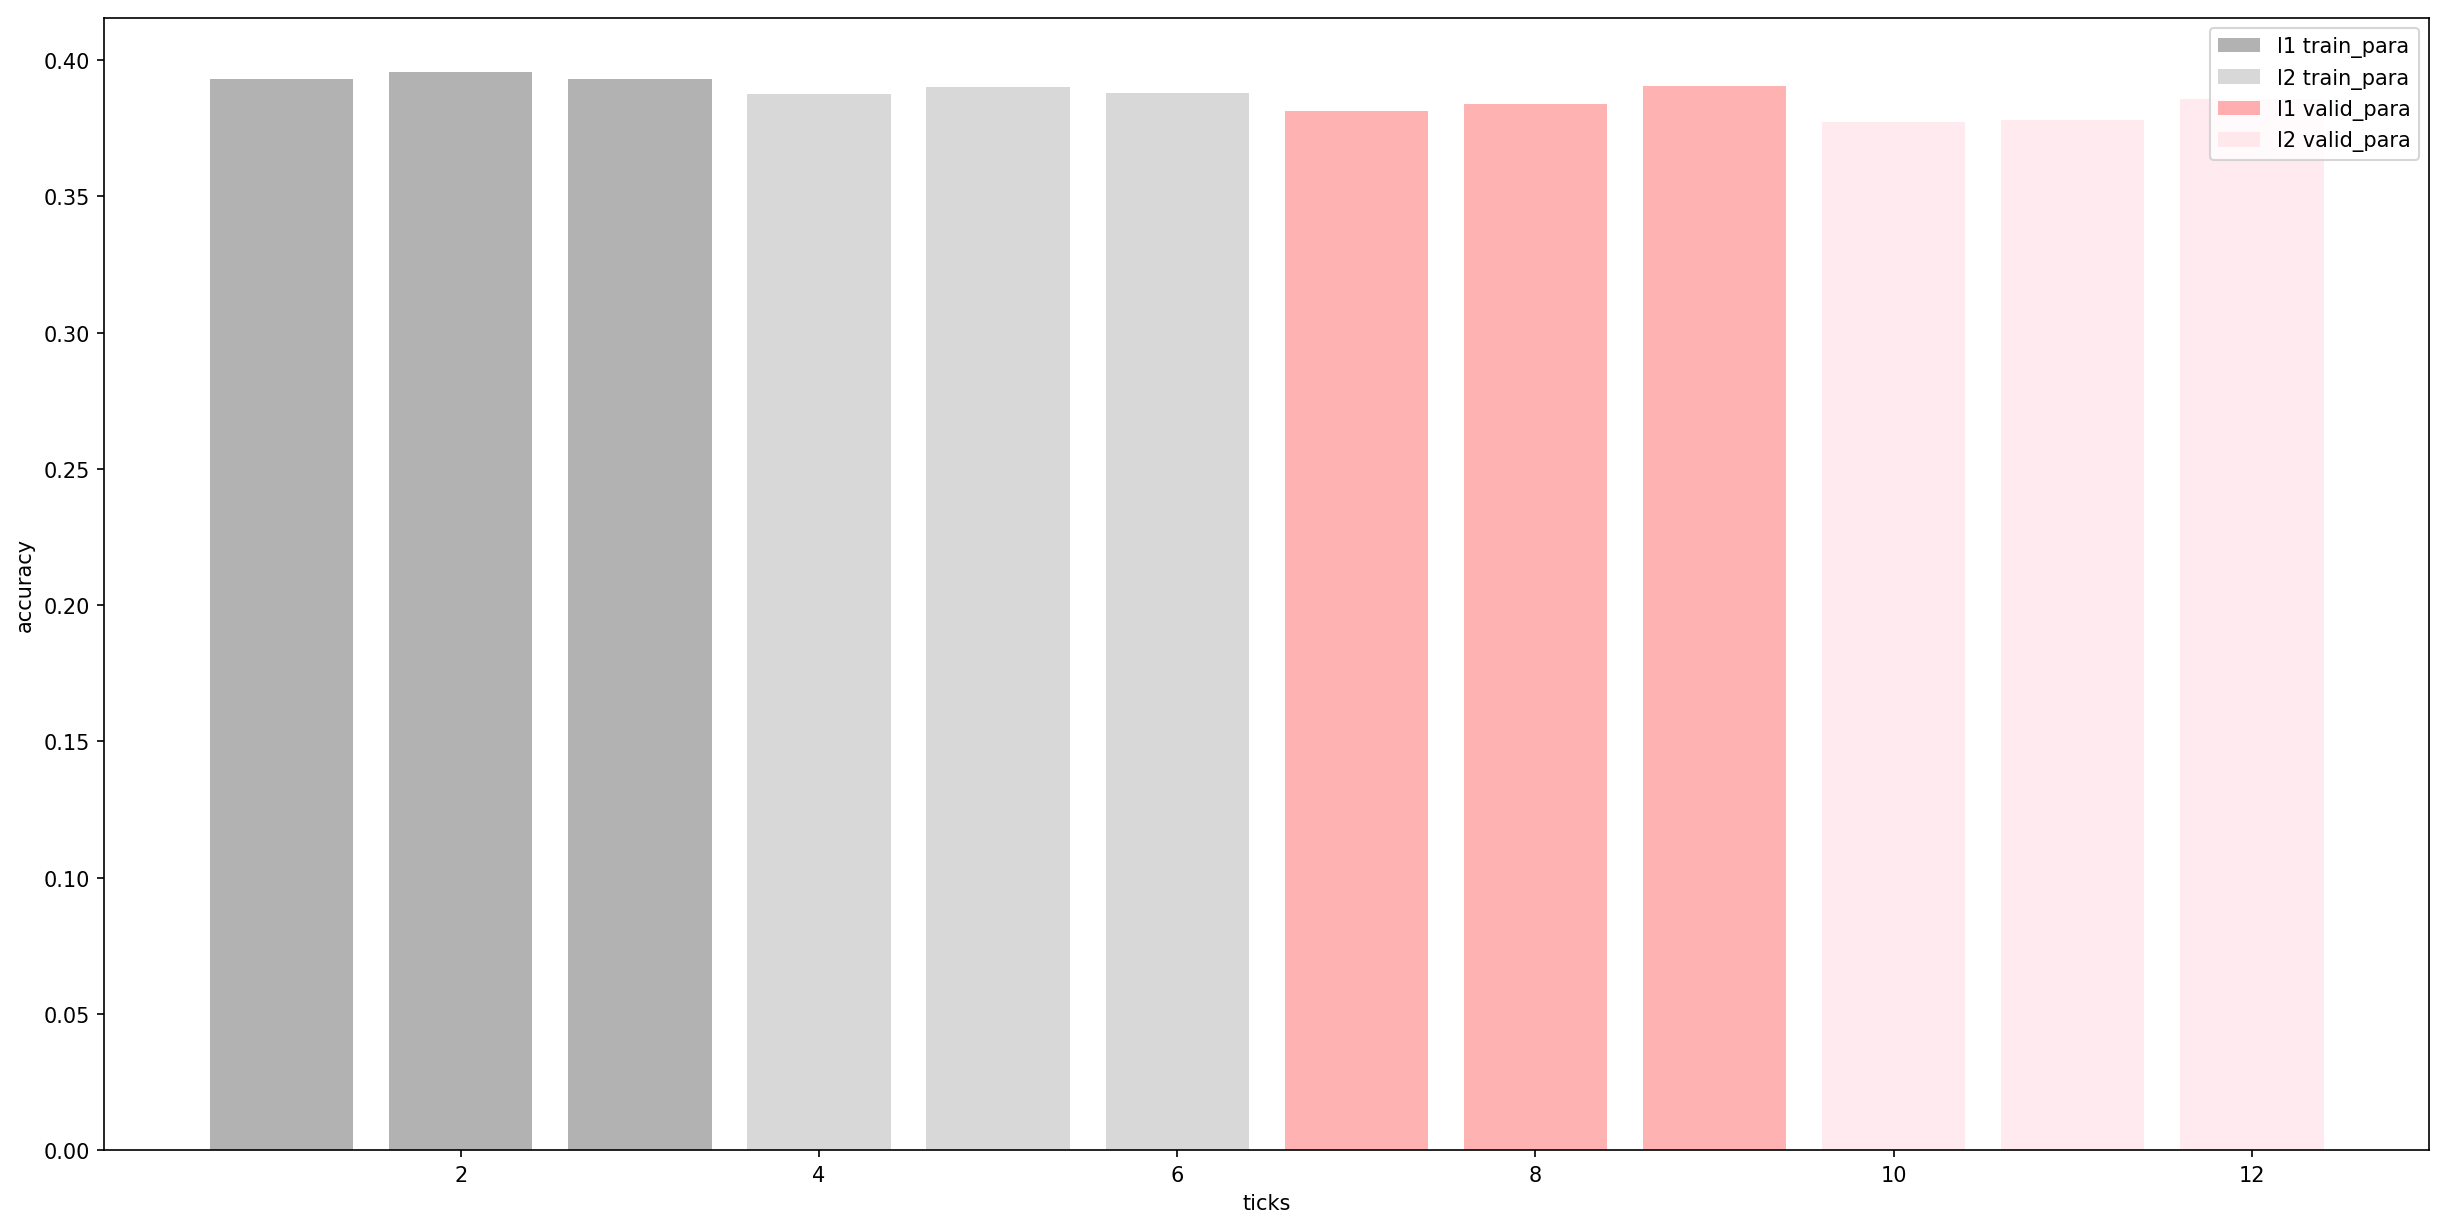

In [32]:
plt.figure(figsize=(20,10),dpi=150)
plt.bar(left=[1,2,3],height=train_parascore[0],label='l1 train_para',color='black',alpha=0.3)
plt.bar(left=[4,5,6],height=train_parascore[1],label='l2 train_para',color='gray',alpha=0.3)
plt.bar(left=[7,8,9],height=valid_parascore[0],label='l1 valid_para',color='red',alpha=0.3)
plt.bar(left=[10,11,12],height=valid_parascore[1],label='l2 valid_para',color='pink',alpha=0.3)
plt.xlabel('ticks')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [29]:
train_parascore,valid_parascore = sklearn.model_selection.validation_curve(estimator=LR,X=train_x,y=train_y,param_name='C',cv=3,verbose=4,param_range=[15,10,5,1,0.5,0.1,0.05])

[CV] C=15 ............................................................


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   20.7s


[CV] ....................... C=15, score=0.381373390558, total=  33.6s
[CV] C=10 ............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   33.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   20.1s


[CV] ....................... C=10, score=0.377510729614, total=  32.5s
[CV] C=5 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   17.0s


[CV] ........................ C=5, score=0.366094420601, total=  28.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   14.4s


[CV] ........................ C=1, score=0.327124463519, total=  24.0s
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   23.8s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   13.1s


[CV] ...................... C=0.5, score=0.305407725322, total=  21.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   21.6s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   10.3s


[CV] ...................... C=0.1, score=0.225922746781, total=  17.0s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   16.9s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   15.1s finished


[CV] ..................... C=0.05, score=0.189613733906, total=  15.4s
[CV] C=15 ............................................................


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   20.9s


[CV] ....................... C=15, score=0.383753983978, total=  34.0s
[CV] C=10 ............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   33.8s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   19.9s


[CV] ....................... C=10, score=0.378154879835, total=  32.4s
[CV] C=5 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   32.2s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   16.8s


[CV] ........................ C=5, score=0.363597209062, total=  27.6s
[CV] C=1 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   27.4s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   14.7s


[CV] ......................... C=1, score=0.32535102076, total=  24.0s
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   23.8s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   12.8s


[CV] ...................... C=0.5, score=0.303816004824, total=  21.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   21.2s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    9.9s


[CV] ...................... C=0.1, score=0.226462227582, total=  16.9s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   16.7s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    9.3s


[CV] ..................... C=0.05, score=0.187957619089, total=  15.7s
[CV] C=15 ............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   15.5s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   20.1s


[CV] ........................ C=15, score=0.39039557782, total=  33.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   32.9s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   20.2s


[CV] ....................... C=10, score=0.385817930558, total=  33.1s
[CV] C=5 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   32.9s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   17.5s


[CV] ........................ C=5, score=0.375194334082, total=  28.9s
[CV] C=1 .............................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   28.7s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   13.6s


[CV] ........................ C=1, score=0.331663499741, total=  23.2s
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   23.0s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   12.7s


[CV] ...................... C=0.5, score=0.308516151321, total=  21.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   21.5s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   10.0s


[CV] ...................... C=0.1, score=0.223959233028, total=  16.9s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   16.7s finished
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    9.3s


[CV] ..................... C=0.05, score=0.184919675246, total=  15.6s


[Parallel(n_jobs=5)]: Done 104 out of 104 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  8.6min finished


In [33]:
train_parascore.shape

(7, 3)

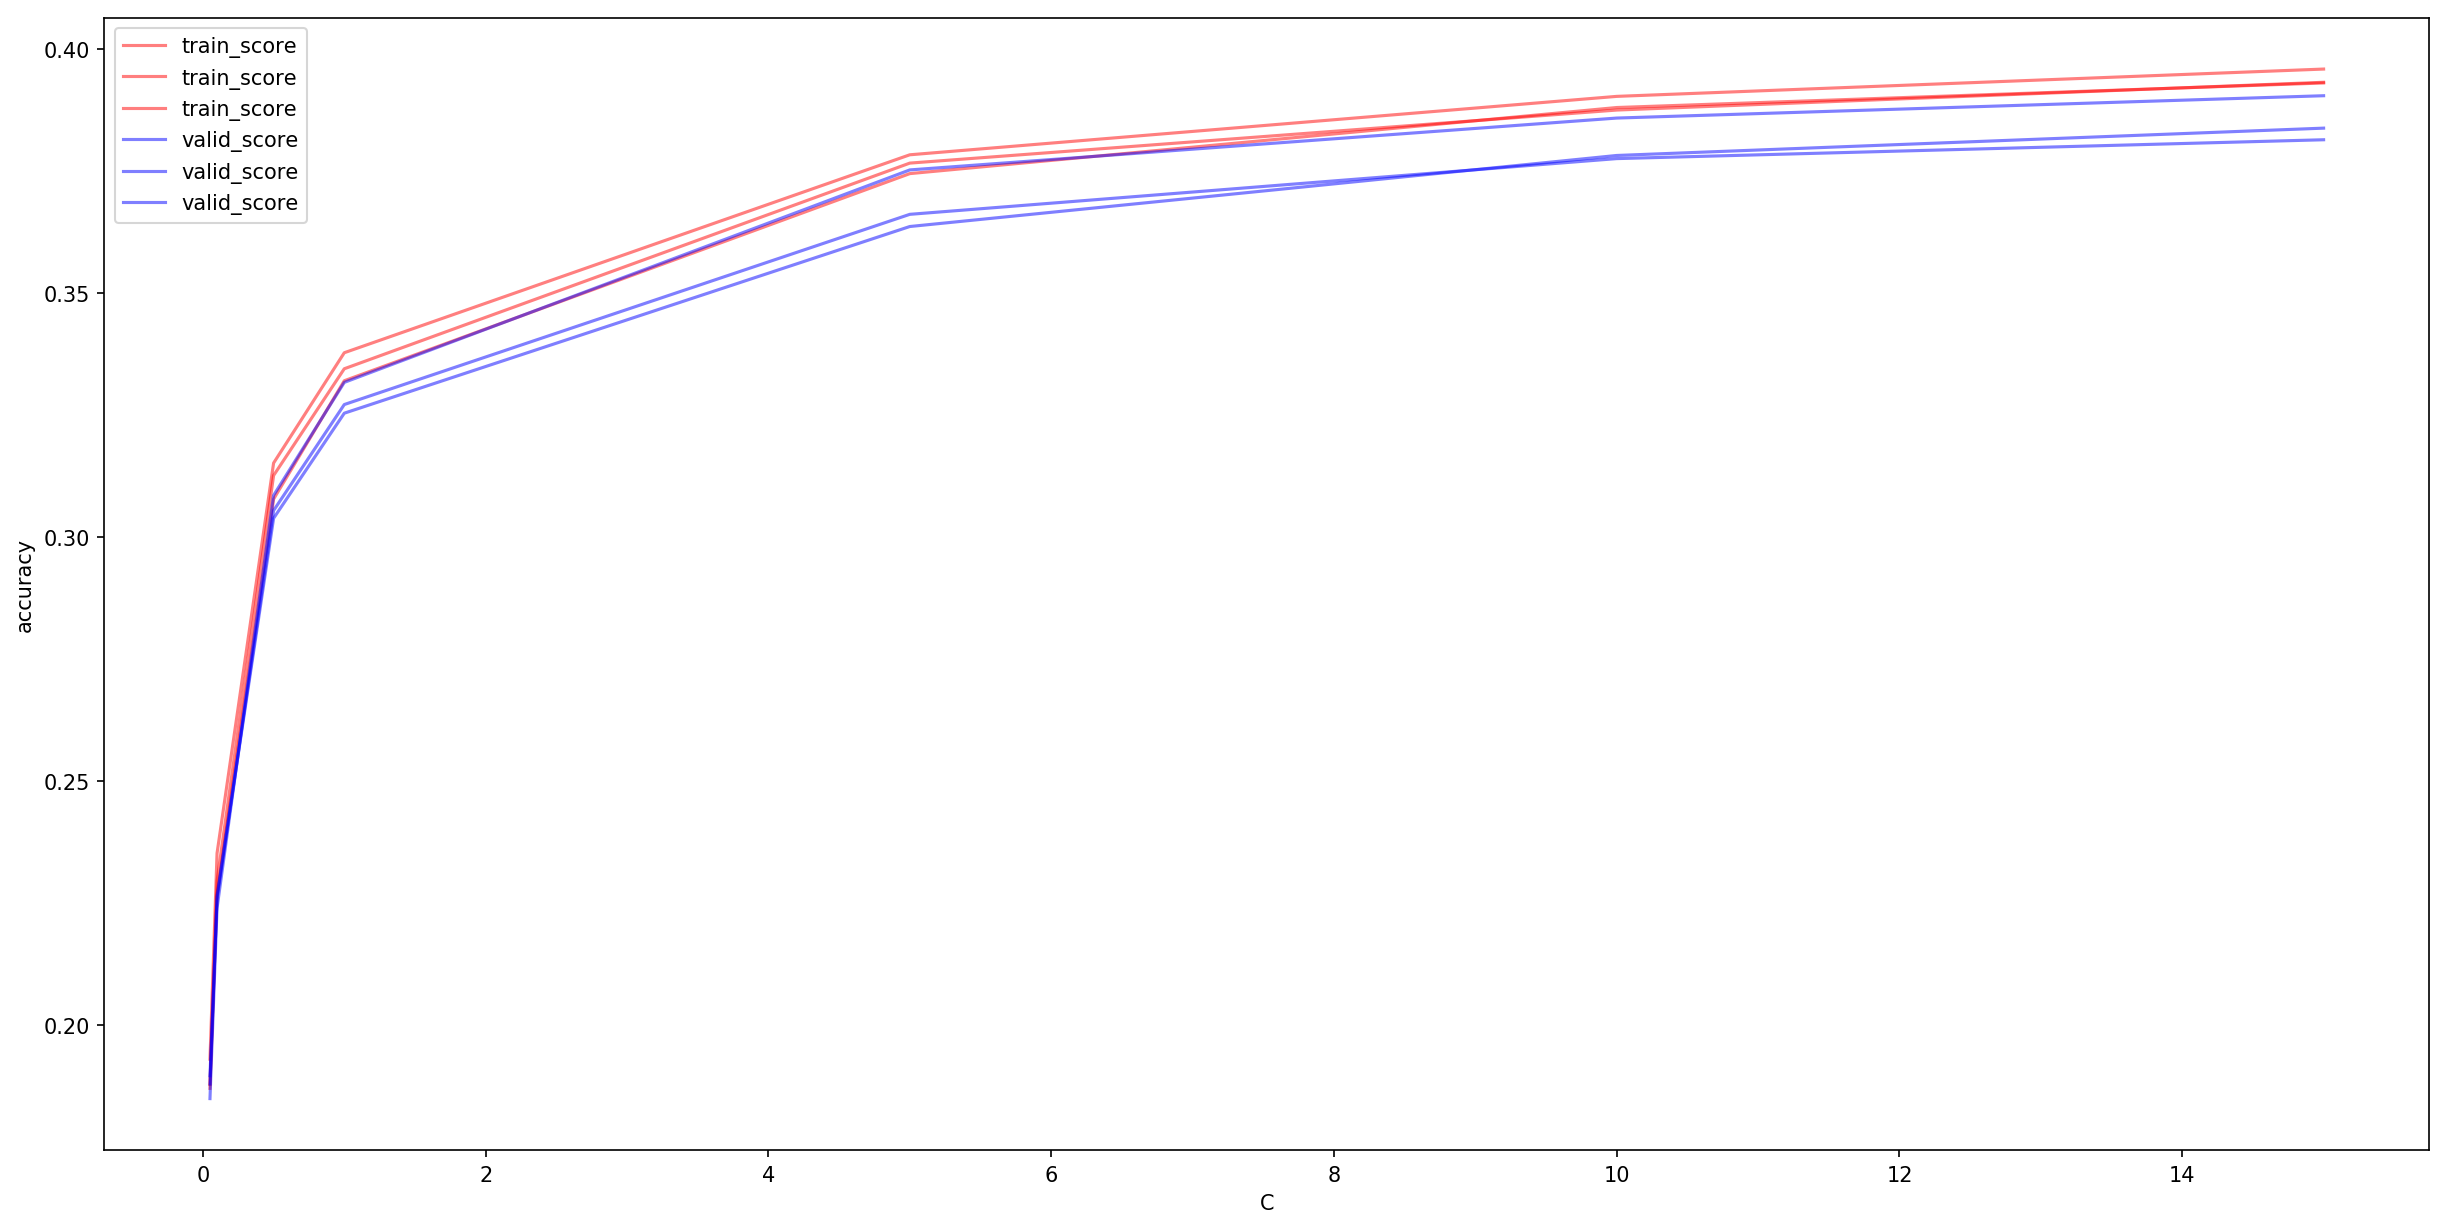

In [34]:
plt.figure(figsize=(20,10),dpi=150)
plt.plot([15,10,5,1,0.5,0.1,0.05],train_parascore,label='train_score',color='red',alpha=0.5)
plt.plot([15,10,5,1,0.5,0.1,0.05],valid_parascore,label='valid_score',color='blue',alpha=0.5)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [42]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
import numpy as np
import random
import data_helper
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score,precision_score,accuracy_score
import graphviz

INPUT_PATH='/home/zju/slx/binarylearning/bisheData/newData/'

def lda_model(train_data,test_data):
    tf_vectorizer = CountVectorizer()
    tf_train_vector = tf_vectorizer.fit_transform(train_data)
    tf_vectorizer.vocabulary_
    tf_test_vector = tf_vectorizer.transform(test_data)
    lda = LatentDirichletAllocation(n_components=35,learning_method='batch')
    doc_topic_distribution = lda.fit_transform(tf_train_vector)
    test_doc_topic_distribution = lda.transform(tf_test_vector)
    return lda,doc_topic_distribution,test_doc_topic_distribution,tf_vectorizer.vocabulary_



print 'loading data'
train_x ,train_y = data_helper.prepare_classification_data(INPUT_PATH+'train.txt',True)
test_x,test_y = data_helper.prepare_classification_data(INPUT_PATH+'test.txt',True)
print 'start fit LDA model'
lda_train,train_doc_topic,test_doc_topic,va = lda_model(train_x,test_x)
print 'complete fitting LDA model,using DOC-TOPIC feature to decision tree '

loading data
start fit LDA model
complete fitting LDA model,using DOC-TOPIC feature to decision tree 


In [46]:
test_doc_topic

array([[  7.93650794e-04,   7.93650794e-04,   7.93650794e-04, ...,
          7.93650794e-04,   7.93650794e-04,   7.93650794e-04],
       [  7.93650794e-04,   7.93650794e-04,   7.93650794e-04, ...,
          7.93650794e-04,   7.93650794e-04,   7.93650794e-04],
       [  7.93650794e-04,   7.93650794e-04,   7.93650794e-04, ...,
          7.93650794e-04,   7.93650794e-04,   7.93650794e-04],
       ..., 
       [  7.14285714e-05,   7.14285714e-05,   7.14285714e-05, ...,
          4.57012515e-02,   7.14285714e-05,   7.14285714e-05],
       [  5.76036866e-05,   5.76036866e-05,   5.76036866e-05, ...,
          5.76036866e-05,   5.76036866e-05,   5.76036866e-05],
       [  1.06609808e-04,   1.06609808e-04,   1.06609808e-04, ...,
          1.06609808e-04,   3.25500402e-02,   1.06609808e-04]])

In [48]:
DT=DecisionTreeClassifier()
DT.fit(X=train_doc_topic,y=train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
pred_y = DT.predict(test_doc_topic)
recall = recall_score(y_true=test_y,y_pred=pred_y,average='macro')
precision = precision_score(y_true=test_y,y_pred=pred_y,average='macro')
acc = accuracy_score(y_true=test_y,y_pred=pred_y)
print 'accuracy recall precision is {0} {1} {2}'.format(acc,recall,precision)

accuracy recall precision is 0.461957618567 0.460838526851 0.463290002617


In [50]:
LR = LogisticRegression(penalty='l2',solver='sag',verbose=5)
LR.fit(X=train_doc_topic,y=train_y)

convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


convergence after 18 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 17 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 18 epochs took 1 seconds
convergence after 17 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   38.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=5, warm_start=False)

In [51]:
pred_y = LR.predict(test_doc_topic)
recall = recall_score(y_true=test_y,y_pred=pred_y,average='macro')
precision = precision_score(y_true=test_y,y_pred=pred_y,average='macro')
acc = accuracy_score(y_true=test_y,y_pred=pred_y)
print 'accuracy recall precision is {0} {1} {2}'.format(acc,recall,precision)

accuracy recall precision is 0.322603430878 0.320856044722 0.320837861476


In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
BG_LR = BaggingClassifier(base_estimator=LR,n_estimators=10)
BG_LR.fit(X=train_doc_topic,y=train_y)

convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 23 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


convergence after 23 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


convergence after 23 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 26 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 26 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 28 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 26 epochs took 1 seconds
convergence after 34 epochs took 0 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   48.7s finished


convergence after 29 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


convergence after 21 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


convergence after 28 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


convergence after 27 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


convergence after 21 epochs took 0 seconds
convergence after 28 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 26 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 26 epochs took 0 seconds
convergence after 32 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.2s finished


convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


convergence after 22 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


convergence after 29 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


convergence after 24 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


convergence after 24 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 27 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 29 epochs took 1 seconds
convergence after 25 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 18 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 28 epochs took 0 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.1s finished


convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 22 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


convergence after 32 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 29 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 17 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 31 epochs took 0 seconds
convergence after 26 epochs took 1 seconds
convergence after 27 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 34 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   49.0s finished


convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 20 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


convergence after 26 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


convergence after 22 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 30 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 32 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 32 epochs took 1 seconds
convergence after 26 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.4s finished


convergence after 21 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


convergence after 24 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


convergence after 25 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 33 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 29 epochs took 1 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 28 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.7s finished


convergence after 28 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


convergence after 35 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


convergence after 20 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 31 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   48.0s finished


convergence after 27 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


convergence after 18 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


convergence after 23 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


convergence after 25 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 18 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 30 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 19 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 31 epochs took 1 seconds
convergence after 33 epochs took 0 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   48.3s finished


convergence after 17 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


convergence after 24 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


convergence after 23 epochs took 0 seconds
convergence after 28 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 34 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 18 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 18 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 26 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 31 epochs took 1 seconds
convergence after 30 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.6s finished


convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


convergence after 22 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


convergence after 27 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


convergence after 30 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 18 epochs took 1 seconds
convergence after 32 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 29 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 18 epochs took 0 seconds
convergence after 23 epochs took 1 seconds
convergence after 24 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 24 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 20 epochs took 1 seconds
convergence after 20 epochs took 0 seconds
convergence after 22 epochs took 1 seconds
convergence after 23 epochs took 0 seconds
convergence after 27 epochs took 1 seconds
convergence

[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:   47.8s finished


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=5, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [60]:
def evalute(estimator,test_x,test_y):
    pred_y = estimator.predict(test_x)
    recall = recall_score(y_true=test_y,y_pred=pred_y,average='macro')
    precision = precision_score(y_true=test_y,y_pred=pred_y,average='macro')
    acc = accuracy_score(y_true=test_y,y_pred=pred_y)
    print 'accuracy recall precision is {0} {1} {2}'.format(acc,recall,precision)

In [61]:
for i in range(10):
    L = BG_LR.estimators_[i]
    evalute(L,test_doc_topic,test_y)

accuracy recall precision is 0.319071644803 0.317218562524 0.321055821878
accuracy recall precision is 0.320080726539 0.317791824921 0.318367023735
accuracy recall precision is 0.322704339051 0.321060717769 0.320904128857
accuracy recall precision is 0.322300706357 0.320146563066 0.325831200951
accuracy recall precision is 0.314429868819 0.311821446293 0.314401484876
accuracy recall precision is 0.322603430878 0.32041966838 0.318286269723
accuracy recall precision is 0.320181634712 0.318950220479 0.320818511121
accuracy recall precision is 0.319576185671 0.318155392415 0.322642942724
accuracy recall precision is 0.319778002018 0.317573531861 0.30872298588
accuracy recall precision is 0.315842583249 0.313992689542 0.304321230908


/home/zju/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
evalute(BG_LR,test_doc_topic,test_y)

accuracy recall precision is 0.324722502523 0.32251128453 0.320899488614


In [69]:
BG_LR.predict(test_doc_topic[0].reshape(1,-1))

array([89])

In [81]:
for i in range(10):
    L = BG_LR.estimators_[i]
    print L.predict(test_doc_topic[0].reshape(1,-1))

[89]
[89]
[43]
[89]
[89]
[89]
[43]
[89]
[89]
[89]


[103]

In [107]:
BG_DT = BaggingClassifier(base_estimator=DT,n_estimators=10,verbose=5)
BG_DT.fit(train_doc_topic,train_y)

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.0s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=5, warm_start=False)

In [108]:
evalute(BG_DT,test_doc_topic,test_y)

accuracy recall precision is 0.554591321897 0.55423261621 0.560792094631


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [118]:
for i in range(10):
    D = BG_DT.estimators_[i]
    print np.argsort(D.feature_importances_)

[25 19 13 34 27  5 11 18 14 21 15 33 23 29 22  0  3 17 20 12  4  1 28  2 10
  9  6 24 30  7 26  8 32 16 31]
[25 13 19 33 27  5  0 34  4 18 28 20 11 29 22 15 14 17 23  3 10 21  9  1 12
  7  6 30 26  2 24 32  8 16 31]
[13 25  5 34 19 27 22 21  0 33 29 20 28 18  3 15  4 12 23 17 11  1 10  2  7
 14  9  6 30 32  8 24 26 16 31]
[13 25 33  5 21 28 14 34 10 29 19  0 27 18 11 20 22  2 23 17 12  4  3  1 15
  8  9  7 30 26  6 24 32 16 31]
[13 25 27 34 19  5 22 17  3 33 21 18 20 15  4 29  2 23 10 28 11  9  0 14  1
  7 12 26  6 30 24  8 32 16 31]
[13 25 27 19  5 14 15 29 33 21 11 23 17 34 20  0 12  1 18  4 22 10 28  3  9
  6  7  2 24 30 32  8 26 16 31]
[25 13 27 34  5 33 29  0 11 17 15 19  3 22 18 28  4 20 21 14 23 12 10  2  1
  9 30  7  8 24 16 32  6 26 31]
[25 13 27 34  5 11 29 33  3 19 20 18 15 21 14 23  9 28  1 22 12  0  4  2 17
 32 10  7 30  6  8 16 24 26 31]
[25 13  5 19 29 33  4 27 18 22 23 21 20 11  3 12  1 34 28  9 15  2 17  0 14
 10  6  7 30 24 26 32  8 16 31]
[13 25  5 19 27 29 34 11 33 

In [109]:
RF = RandomForestClassifier(n_estimators=10,verbose=5)
RF.fit(X=train_doc_topic,y=train_y)

building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=5,
            warm_start=False)

In [110]:
evalute(RF,test_doc_topic,test_y)

accuracy recall precision is 0.52492431887 0.523432159927 0.529286324599


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [115]:
for i in range(10):
    D = RF.estimators_[i]
    evalute(D,test_doc_topic,test_y)

accuracy recall precision is 0.368819374369 0.367158373772 0.37066362883
accuracy recall precision is 0.35862764884 0.357304961549 0.359993988091
accuracy recall precision is 0.357618567104 0.355730893843 0.356761670516
accuracy recall precision is 0.368920282543 0.367306662276 0.367610054561
accuracy recall precision is 0.353481331988 0.351270396528 0.354992053025
accuracy recall precision is 0.368516649849 0.366574375079 0.370214612195
accuracy recall precision is 0.366498486377 0.363934142205 0.362943404937
accuracy recall precision is 0.357114026236 0.355148835616 0.357415556842
accuracy recall precision is 0.367103935419 0.364862451036 0.367194609713
accuracy recall precision is 0.371442986882 0.369140056749 0.370531132082


In [119]:
for i in range(10):
    D = RF.estimators_[i]
    print np.argsort(D.feature_importances_)

[13 25 19 21 34  5 11 27 29 33 15 12  3  1 14 28  4 17 23 18  9  0 10  2 22
  7 20  6 16 26 30 32  8 24 31]
[19 25 13 34  5 29 21  0  3 14 27 11 12 18 15 22 28 17 23 33  2  4  9 20 10
 30  8 24 32  7 16  1 26  6 31]
[25 13 27 11 33 19  5  3 34 15 29  0 21 12 14 20  9 18 22 17 23  2  7 28  4
 10 30  1 32 16 26  8  6 24 31]
[13 25 34 11 21 27 29 12  5 15 19 17  0 33  2  9  4  3 18  6 14 23 20 26 16
 28 22 10  7  1 24 32 30  8 31]
[13 27 25 33 34 19 29  3  5 10 21  0 15 17  9 12 14  1 11 18 22 28  2 23  4
 20 24  7  8  6 32 26 16 30 31]
[13 25 27 21 29 34 33 19  0 11 17 12 14 15 20  5 28  4 23  3 10  1 22  2  9
 18 32  6  7 24 26 16 30  8 31]
[13 34 25 19 29  5 21 27  4 33 15 12 11 14 28  2  9 10 18 22 26 20 23 17 32
  3  0  1 24 16  7  8  6 30 31]
[25 19 13 27 34 29 15 12 33 21  5 11  3  4 18  9  0  2 28 17 10 14 23  1 22
 16  7 20  8  6 32 30 24 26 31]
[ 5 25 13 19 29 21 27 33 34 11  4 17  3 28 12 23 22  0 18 20 14 15  1  9 10
  7  6  2 16  8 26 32 24 30 31]
[13 25 11 21 34 29 27 33 12 

In [121]:
np.argsort(RF.feature_importances_)

array([13, 25, 34, 27, 19, 29,  5, 21, 11, 33, 12, 15,  3,  0, 14, 17,  4,
       18,  9, 28,  2, 23, 22, 20, 10,  1,  7, 16, 32,  6, 26, 24,  8, 30,
       31])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve,validation_curve

In [ ]:
SVM =SVC(verbose=True)
SVM.fit(train_doc_topic,train_y)

In [ ]:
pred_y = SVM.predict(test_doc_topic)
recall = recall_score(y_true=test_y,y_pred=pred_y,average='macro')
precision = precision_score(y_true=test_y,y_pred=pred_y,average='macro')
acc = accuracy_score(y_true=test_y,y_pred=pred_y)
print 'accuracy recall precision is {0} {1} {2}'.format(acc,recall,precision)

In [ ]:
train_size,train_score,valid_score = learning_curve(estimator=DT,X=train_doc_topic,y=train_y,cv=3,train_sizes=np.linspace(0.1,1.0,5),verbose=5,scoring='accuracy',shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(20,10),dpi=150)
ax = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.grid(True)
ax.plot(train_size,train_score,label='train_score',color='pink')
ax.plot(train_size,valid_score,label='valid_score',color='gray')
ax.set_xlabel('samples')
ax.set_ylabel('acc')
ax.set_title('learning curve')
ax.legend()
plt.show

In [ ]:
train_score,valid_score=validation_curve(estimator=DT,X=train_doc_topic,y=train_y,cv=3,param_name='max_depth',param_range=[6,8,10,15,20,50],scoring='accuracy',verbose=5)

In [ ]:
plt.figure(figsize=(20,10),dpi=150)
ax = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.grid(True)
ax.plot([6,8,10,15,20,50],train_score,label='train_score',color='pink')
ax.plot([6,8,10,15,20,50],valid_score,label='valid_score',color='gray')
ax.set_xlabel('max_depth')
ax.set_ylabel('acc')
ax.set_title('learning curve')
ax.legend()
plt.show

In [ ]:
train_size,train_score,valid_score = learning_curve(estimator=SVM,X=train_doc_topic,y=train_y,cv=3,train_sizes=np.linspace(0.1,1.0,5),verbose=5,scoring='accuracy',shuffle=True)

In [ ]:
plt.figure(figsize=(20,10),dpi=150)
ax = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.grid(True)
ax.plot(train_size,train_score,label='train_score',color='pink')
ax.plot(train_size,valid_score,label='valid_score',color='gray')
ax.set_xlabel('samples')
ax.set_ylabel('acc')
ax.set_title('learning curve')
ax.legend()
plt.show

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pred_y = RF.predict(test_doc_topic)
recall = recall_score(y_true=test_y,y_pred=pred_y,average='macro')
precision = precision_score(y_true=test_y,y_pred=pred_y,average='macro')
acc = accuracy_score(y_true=test_y,y_pred=pred_y)
print 'accuracy recall precision is {0} {1} {2}'.format(acc,recall,precision)

In [ ]:
RF.feature_importances_

In [ ]:
RF.estimators_,RF.n_features_

In [ ]:
RF.oob_score,RF.oob_decision_function_

In [ ]:
import sklearn
dot = []
for i in range(RF.n_estimators):
    dot = sklearn.tree.export_graphviz(RF[i],out_file='./tree%d.dot'%(i))

In [ ]:
import subprocess

In [ ]:
current_path ='/home/zju/slx/PycharmProjects/binarylearning/'
for i in range(RF.n_estimators):
    cmd = 'dot -Tpng /home/zju/slx/PycharmProjects/binarylearning/tree%i.dot -o /home/zju/slx/PycharmProjects/binarylearning/tree%i.png'%(i,i)
    print cmd
    p = subprocess.Popen(cmd,shell=True)
    stdout, stderr = p.communicate()